[ 연도별 고독사 추이 ] <hr>

In [270]:
## [1-1] 모듈 로딩
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name) 

In [271]:
## [1-2] 데이터 준비
D_FILE2='./고독사_발생_현황_성별·연령별_20250202141556.xlsx'

In [289]:
## [1-3] 데이터 로딩
loneDF2=pd.read_excel(D_FILE2)
loneDF2


,연도 연령별,2019 남자,2019 여자,2019 합계,2020 남자,2020 여자,2020 합계,2021 남자,2021 여자,2021 합계,2022 남자,2022 여자,2022 합계,2023 남자,2023 여자,2023 합계
0,20대,33,18,51,20,26,46,37,16,53,44,15,59,22,20,42
1,30대,112,50,162,103,54,157,120,44,164,111,35,146,115,51,166
2,40대,408,96,504,378,86,464,436,88,524,423,97,520,402,98,500
3,50대,769,92,861,894,124,1018,900,91,991,946,121,1067,970,123,1093
4,60대,587,92,679,796,104,900,860,114,974,979,128,1107,1004,138,1142
5,70대,276,89,365,285,88,373,314,104,418,339,91,430,387,79,466
6,80대이상,102,70,172,132,73,205,135,67,202,118,68,186,135,67,202


In [290]:
loneDF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   연도 연령별   7 non-null      object
 1   2019 남자  7 non-null      int64 
 2   2019 여자  7 non-null      int64 
 3   2019 합계  7 non-null      int64 
 4   2020 남자  7 non-null      int64 
 5   2020 여자  7 non-null      int64 
 6   2020 합계  7 non-null      int64 
 7   2021 남자  7 non-null      int64 
 8   2021 여자  7 non-null      int64 
 9   2021 합계  7 non-null      int64 
 10  2022 남자  7 non-null      int64 
 11  2022 여자  7 non-null      int64 
 12  2022 합계  7 non-null      int64 
 13  2023 남자  7 non-null      int64 
 14  2023 여자  7 non-null      int64 
 15  2023 합계  7 non-null      int64 
dtypes: int64(15), object(1)
memory usage: 1.0+ KB


In [274]:
loneDF2.columns

Index(['연도 연령별', '2019 남자', '2019 여자', '2019 합계', '2020 남자', '2020 여자',
       '2020 합계', '2021 남자', '2021 여자', '2021 합계', '2022 남자', '2022 여자',
       '2022 합계', '2023 남자', '2023 여자', '2023 합계'],
      dtype='object')

In [277]:
loneDF2.head()

,연도 연령별,2019 남자,2019 여자,2019 합계,2020 남자,2020 여자,2020 합계,2021 남자,2021 여자,2021 합계,2022 남자,2022 여자,2022 합계,2023 남자,2023 여자,2023 합계
0,20대,33,18,51,20,26,46,37,16,53,44,15,59,22,20,42
1,30대,112,50,162,103,54,157,120,44,164,111,35,146,115,51,166
2,40대,408,96,504,378,86,464,436,88,524,423,97,520,402,98,500
3,50대,769,92,861,894,124,1018,900,91,991,946,121,1067,970,123,1093
4,60대,587,92,679,796,104,900,860,114,974,979,128,1107,1004,138,1142


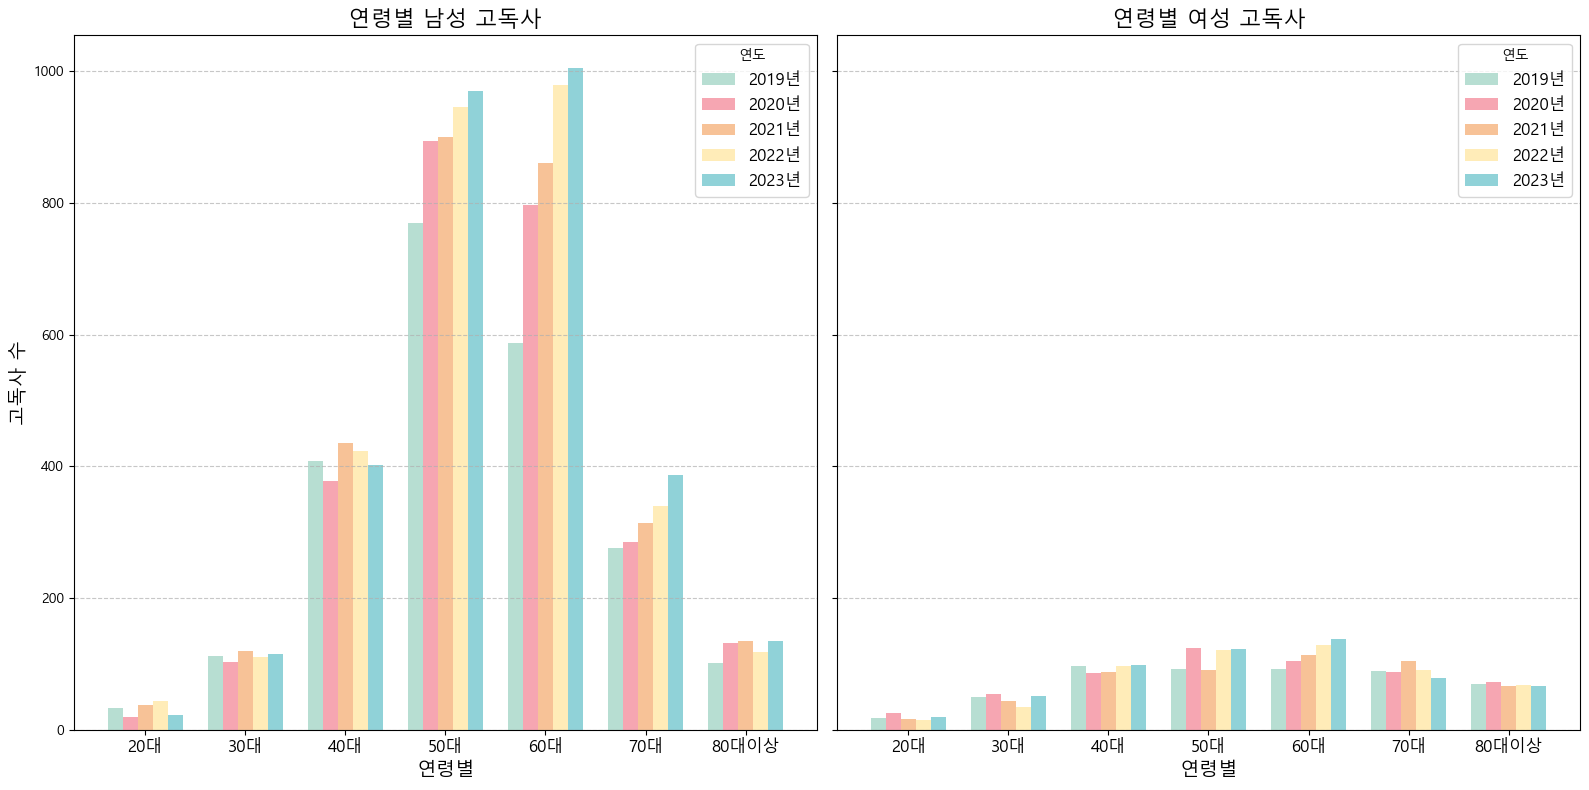

In [293]:
# 컬럼 이름 변경
loneDF2.rename(columns={'연도 연령별': '연령별'}, inplace=True)

# 연도 리스트
years = [2019, 2020, 2021, 2022, 2023]


# 연령별로 남성과 여성을 분리하여 비교하는 그래프
def plot_age_comparison_split_gender(df):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)  # 남녀를 나란히 표시 (2개의 서브플롯)
    
    # X축 데이터 (연령별)
    x = df['연령별']
    num_age_groups = len(x)  # 연령 그룹 개수
    width = 0.15  # 막대 너비
    offsets = [-0.3, -0.15, 0, 0.15, 0.3]  # 연도별 막대 위치 조정

    # 연도별 색상 설정
    colors = ['#b7ded2', '#f6a6b2', '#f7c297', '#ffecb8', '#90d2d8']

    # 남성 그래프
    axes[0].set_title('연령별 남성 고독사', fontsize=16)
    for i, year in enumerate(years):
        male_values = df[f'{year} 남자']
        axes[0].bar(
            [xi + offsets[i] for xi in range(num_age_groups)], 
            male_values, width=width, label=f'{year}년', color=colors[i]
        )
    axes[0].set_xlabel('연령별', fontsize=14)
    axes[0].set_ylabel('고독사 수', fontsize=14)
    axes[0].set_xticks(range(num_age_groups))
    axes[0].set_xticklabels(x, fontsize=12)
    axes[0].legend(title="연도", fontsize=12)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # 여성 그래프
    axes[1].set_title('연령별 여성 고독사', fontsize=16)
    for i, year in enumerate(years):
        female_values = df[f'{year} 여자']
        axes[1].bar(
            [xi + offsets[i] for xi in range(num_age_groups)], 
            female_values, width=width, label=f'{year}년', color=colors[i],
        )
    axes[1].set_xlabel('연령별', fontsize=14)
    axes[1].set_xticks(range(num_age_groups))
    axes[1].set_xticklabels(x, fontsize=12)
    axes[1].legend(title="연도", fontsize=12)
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# 실행: 남성과 여성을 분리하여 연령별 비교
plot_age_comparison_split_gender(loneDF2)

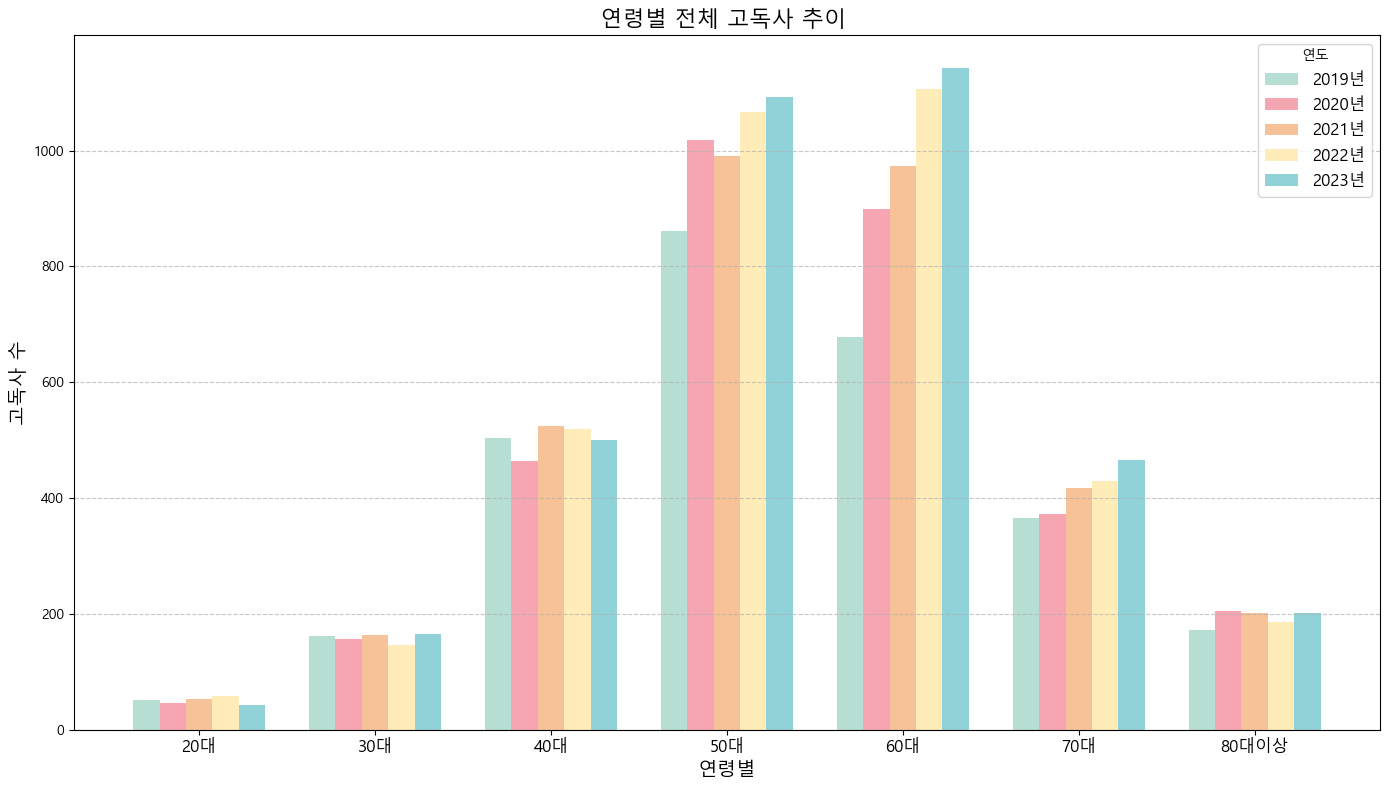

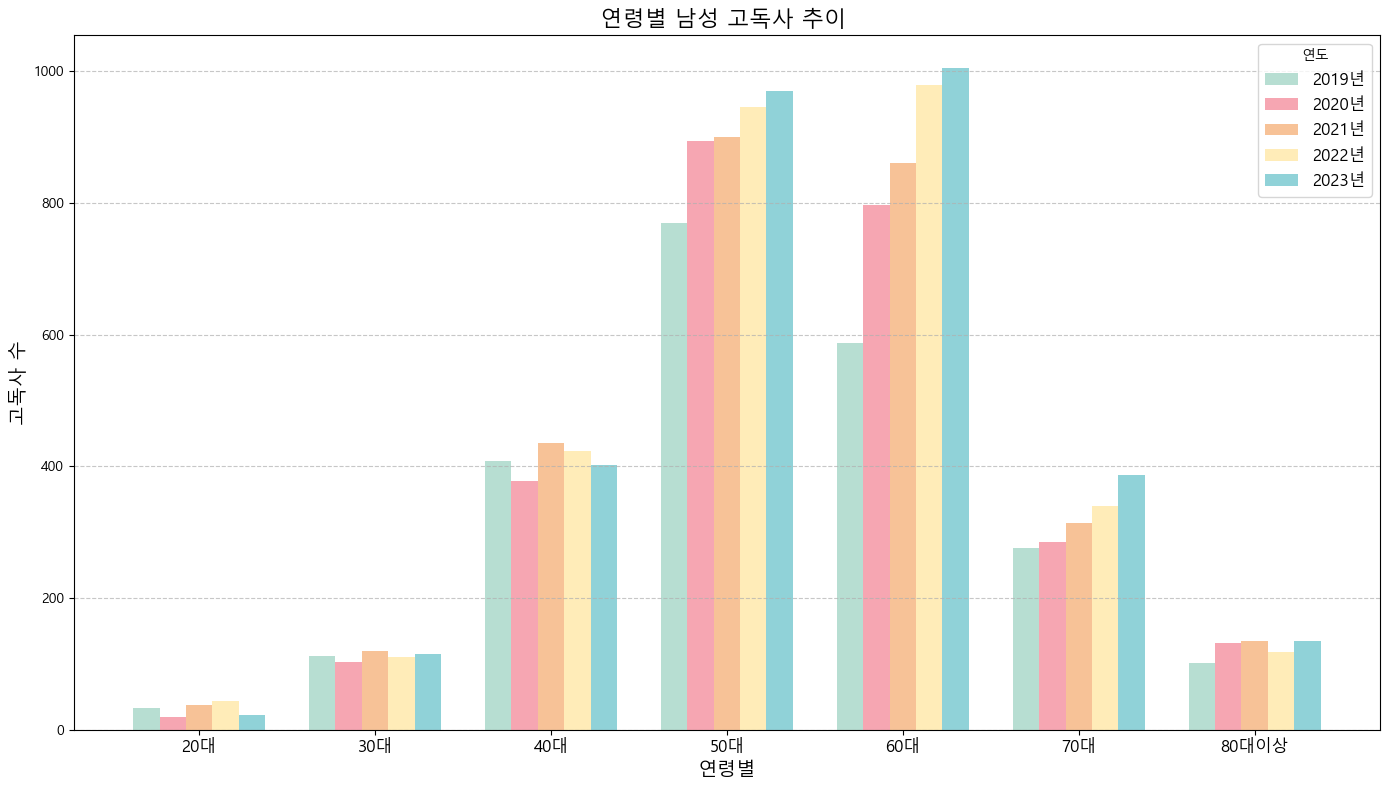

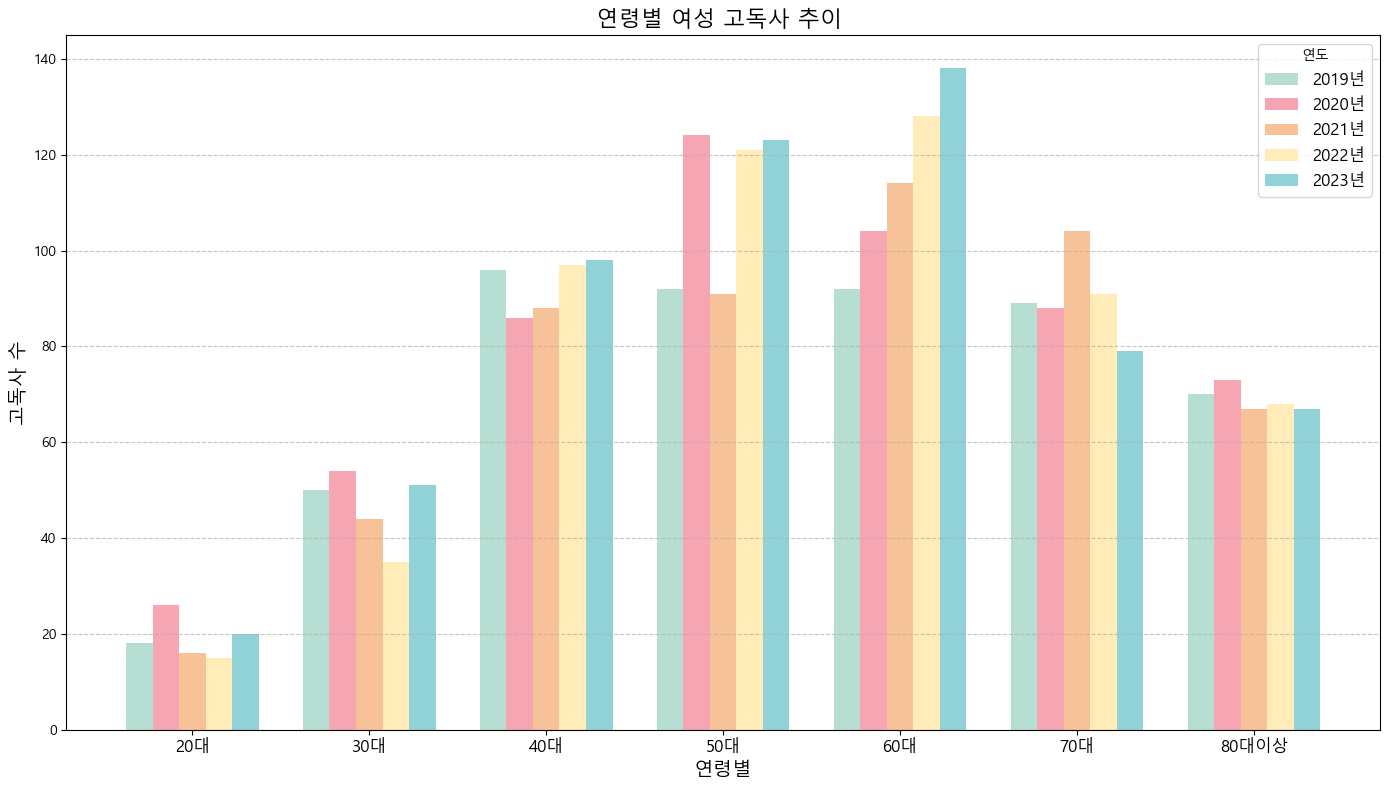

In [291]:
# 컬럼 이름 변경 (연령별 컬럼을 정확하게 설정)
loneDF2.rename(columns={'연도 연령별': '연령별'}, inplace=True)

# 연도 리스트
years = [2019, 2020, 2021, 2022, 2023]

# 연도별 색상 설정
colors = ['#b7ded2', '#f6a6b2', '#f7c297', '#ffecb8', '#90d2d8']

# 그래프 그리기 함수 (합계, 남성, 여성 선택 가능)
def plot_bar_graph_all_years(df, gender='합계'):
    plt.figure(figsize=(14, 8))

    # X축 데이터 (연령별)
    x = df['연령별']
    num_age_groups = len(x)  # 연령 그룹 개수
    width = 0.15  # 막대 너비 설정
    offsets = [-0.3, -0.15, 0, 0.15, 0.3]  # 연도별 막대 위치 조정

    # 연도별 데이터 그래프 추가
    for i, year in enumerate(years):
        plt.bar(
            [xi + offsets[i] for xi in range(num_age_groups)],  # 위치 조정
            df[f'{year} {gender}'], width=width, label=f'{year}년', color=colors[i]
        )
    # 그래프 꾸미기
    title_gender = "전체" if gender == "합계" else ("남성" if gender == "남자" else "여성")
    plt.title(f'연령별 {title_gender} 고독사 추이 ', fontsize=16)
    plt.xlabel('연령별', fontsize=14)
    plt.ylabel('고독사 수', fontsize=14)
    plt.xticks(range(num_age_groups), x, fontsize=12)  # X축 위치 조정
    plt.legend(title="연도", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show() 


# 전체 합계 그래프 실행 
plot_bar_graph_all_years(loneDF2, gender='합계')

# 남성 데이터 그래프 실행 
plot_bar_graph_all_years(loneDF2, gender='남자')

# 여성 데이터 그래프 실행 
plot_bar_graph_all_years(loneDF2, gender='여자') 
